<a href="https://colab.research.google.com/github/mc-off/ML/blob/main/RPS_prediction/RPS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manual preprocessing

I just decided to do manual keying and resize each images and check how the accuracy changed by comparison with keras preprocessing

In [ ]:
import cv2
import glob
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
basedir = '/content/gdrive/My Drive/data/rockpaperscissors/rps-cv-images/'

### Check how does it look like: 

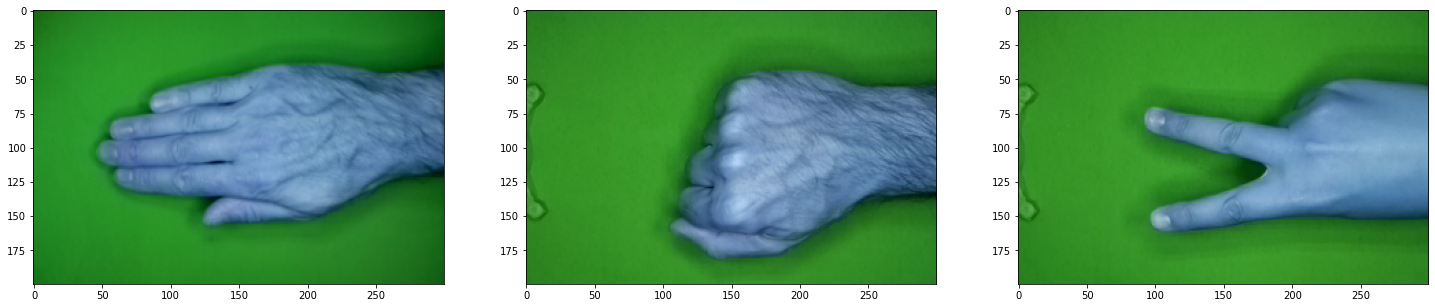

In [ ]:
paper = cv2.imread(basedir+'paper/1jHtb93pI8f6pfKo.png')
rock = cv2.imread(basedir+'rock/0bioBZYFCXqJIulm.png')
scissors = cv2.imread(basedir+'scissors/1L1n6plr7jlZGirw.png')

plt.subplots(1,3, figsize=(25,10))

plt.subplot(1,3,1)
plt.imshow(paper)

plt.subplot(1,3,2)
plt.imshow(rock)

plt.subplot(1,3,3)
plt.imshow(scissors)
plt.show()

### What we gonna do: 

- Replacing the green with a white background


- Resizing from **300W by 200H** to **300W by 300H** maintaining aspect ratio


- Rotating the image 90 degrees clockwise

Let's test on one image

In [ ]:
class_names = ['paper','rock','scissors']
class_names

['paper', 'rock', 'scissors']

In [ ]:
class_paths = glob.glob(basedir+f'{class_names[2]}/*.png')
ex_image_path = class_paths[0]
ex_image_path

'/content/gdrive/My Drive/data/rockpaperscissors/rps-cv-images/scissors/46fOqpoVsNjc9m9m.png'

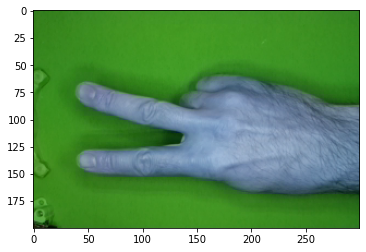

In [ ]:
ex_image = cv2.imread(ex_image_path)

plt.figure()
plt.imshow(ex_image)
plt.show()

To replace green screen we can use `cv2.floodFill()` that connecting pixels starting from the image corners

`cv2.Canny()` edge detection output will be used as a `mask` to stop the floodFill at the hand outline. 

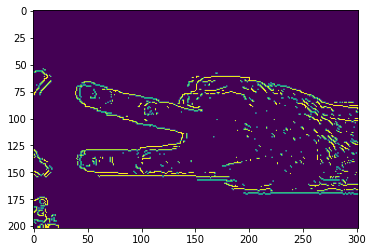

In [ ]:
image_edges = cv2.Canny(ex_image, 100,100)

image_mask = cv2.copyMakeBorder(image_edges,1,1,1,1,cv2.BORDER_REFLECT)

plt.figure()
plt.imshow(image_mask)
plt.show()

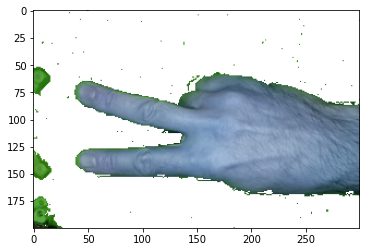

In [ ]:
ex_image_filed = ex_image.copy()

cv2.floodFill(image=ex_image_filed, mask=image_mask, seedPoint=(10,4), newVal=(255,255,255), 
              loDiff=(2,151,100), upDiff=(2,151,100), flags=8)
cv2.floodFill(ex_image_filed, image_mask, (11,197), (255,255,255), (2,151,100), (2,151,100), flags=8)
cv2.floodFill(ex_image_filed, image_mask, (299,3), (255,255,255), (2,151,65), (2,151,65), flags=8)
cv2.floodFill(ex_image_filed, image_mask, (299,198), (255,255,255), (2,151,65), (2,151,65), flags=8)


plt.figure()
plt.imshow(ex_image_filed)
plt.show()

## Generation of new data

In [ ]:
for name in class_names: 

    os.chdir(basedir)
    class_paths = glob.glob(f'{name}/*.png')
    
    image_names = [] 
    
    for path in class_paths: 

        path_removed = path.replace(f'{name}/','')
        type_removed = path_removed.replace('.png','')

        print(f'{path} vs {type_removed}')

        image_names.append(type_removed)
    

    for index in np.arange(0,len(class_paths)):

        os.chdir(basedir)
      
        read_image = cv2.imread(class_paths[index], cv2.COLOR_BGR2RGB)
        
        original_size = read_image.shape[:2]
        
        detect_edge = cv2.Canny(read_image, 100, 100)
        edge_mask = cv2.copyMakeBorder(detect_edge,1,1,1,1,cv2.BORDER_REFLECT)

        filled = read_image.copy()
        
        cv2.floodFill(image=filled, mask=edge_mask, seedPoint=(10,3), newVal=(255,255,255), 
                      loDiff=(2,151,100), upDiff=(2,151,100), flags=8)
        cv2.floodFill(filled, edge_mask, (10,197), (255,255,255), (2,151,100), (2,151,100), flags=8)
        cv2.floodFill(filled, edge_mask, (299,3), (255,255,255), (2,151,65), (2,151,65), flags=8)
        cv2.floodFill(filled, edge_mask, (299,197), (255,255,255), (2,151,65), (2,151,65), flags=8)
        
        final_image = filled

        os.chdir(f'training_set/{name}/')

        status = cv2.imwrite(f'{image_names[index]}.png', final_image)
        
        print(f'{image_names[index]} resized, rotated and saved to "{name}" folder. {status}')     

paper/41HC0VBlHSRhi0AG.png vs 41HC0VBlHSRhi0AG
paper/14K62H4KG1hg5qiJ.png vs 14K62H4KG1hg5qiJ
paper/4Fxr7klOIfijCpio.png vs 4Fxr7klOIfijCpio
paper/1Dfw5FRlS4h60JPX.png vs 1Dfw5FRlS4h60JPX
paper/5NsmQol0TP7h80bh.png vs 5NsmQol0TP7h80bh
paper/5eRezaxzYX8Canq0.png vs 5eRezaxzYX8Canq0
paper/4484TuJc6AH7pDOG.png vs 4484TuJc6AH7pDOG
paper/4IwJ2iL6pFz5ARWA.png vs 4IwJ2iL6pFz5ARWA
paper/4hcthlc3eCByBJFh.png vs 4hcthlc3eCByBJFh
paper/1Tt9U9SzrOm98Xtw.png vs 1Tt9U9SzrOm98Xtw
paper/1fKclJk4eBWOQSR1.png vs 1fKclJk4eBWOQSR1
paper/0t08v9bAaA0mXGCQ.png vs 0t08v9bAaA0mXGCQ
paper/0Uomd0HvOB33m47I.png vs 0Uomd0HvOB33m47I
paper/1jHtb93pI8f6pfKo.png vs 1jHtb93pI8f6pfKo
paper/50Wjlq1jW7o3wcl8.png vs 50Wjlq1jW7o3wcl8
paper/2IOsxsG8AaxntdJM.png vs 2IOsxsG8AaxntdJM
paper/45OQyZuXtfNCc8Rk.png vs 45OQyZuXtfNCc8Rk
paper/0vugygEjxQJPr9yz.png vs 0vugygEjxQJPr9yz
paper/5jcXrtjEVtQwI0Wa.png vs 5jcXrtjEVtQwI0Wa
paper/45ho1tx7W1LZB0DU.png vs 45ho1tx7W1LZB0DU
paper/5FVy5hSvZ9c0M2Y5.png vs 5FVy5hSvZ9c0M2Y5
paper/4Bimc2E

FileNotFoundError: ignored

#Tests

In [12]:
!pip install tensorflow  # stable

     |████████████████████████████████| 2.9MB 12.1MB/s 
ERROR: tf-nightly 2.5.0.dev20201226 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [340]:
import tensorflow as tf
import pandas as pd
import keras
import os
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, VGG19, Xception
#from keras.applications.resnet152 import ResNet152V2
from keras.applications import DenseNet201

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [3]:
basedir = '/content/gdrive/My Drive/data/rockpaperscissors/'
raw_data_dir = basedir +'rps-cv-images'
proc_data_dir = basedir +'training_set'

###Raw

In [4]:
raw_img_gen = ImageDataGenerator(
    rescale=1./255,        
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    validation_split = 0.2,
    fill_mode='nearest'
) 

In [5]:
train = raw_img_gen.flow_from_directory(
    raw_data_dir,
    target_size = (200,200),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=True,
    color_mode = 'rgb',
    subset = 'training'
)

val = raw_img_gen.flow_from_directory(
    raw_data_dir,
    target_size=(200,200),
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb',
    subset = 'validation'
)

train.class_indices

Found 1759 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


{'paper': 0, 'rock': 1, 'scissors': 2}

###PreProcessed

In [6]:
pre_img_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip = True,        
    zoom_range=0.2,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    validation_split = 0.2,
    fill_mode='nearest'
) 

In [7]:
pre_train = pre_img_gen.flow_from_directory(
    proc_data_dir,
    target_size = (200,200),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=True,
    color_mode = 'rgb',
    subset = 'training'
)

pre_val = raw_img_gen.flow_from_directory(
    proc_data_dir,
    target_size=(200,200),
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb',
    subset = 'validation'
)

pre_train.class_indices

Found 1760 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


{'paper': 0, 'rock': 1, 'scissors': 2}

### Util

In [8]:
def show_accuracy_and_loss_trands(backlog):
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))

  axs[0].set_title('Loss')
  axs[0].plot(backlog.history['loss'], color='red', label='train')
  axs[0].plot(backlog.history['val_loss'], color='green', label='validation')

  axs[1].set_title('Accuracy')
  axs[1].plot(backlog.history['accuracy'], color='red', label='train')
  axs[1].plot(backlog.history['val_accuracy'], color='green', label='validation')

  plt.legend(loc="best")
  fig.show()

In [9]:
def show_eval(model, val):
  _, acc = model.evaluate(x=val, steps=len(val))
  print('Accuracy: %.f' % (acc * 100.0))
  return acc

###TPU test

In [ ]:
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.34.106.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.34.106.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


###GPU test

In [8]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import subprocess
print(subprocess.getoutput('nvidia-smi'))

Sat Dec 26 14:44:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W /  70W |    109MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

In [ ]:
# Import packages
import os,sys,humanize,psutil,GPUtil

# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
mem_report()

In [30]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [31]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17232014221637932997, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4411272875700994317
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [32]:
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

# Creates some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [10]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# !pip install wandb
import wandb
wandb.init()

## Model

###Data

In [11]:
num_classes=3
classes = 3 
pixels = 200
channels = 3 #if 3 'color_mode="rgb"', if 1 'color_mode="grayscale"'
batch_size = 20

# Training the model for a minimum of 12 and maximum of 30 epochs
min_epochs=12
epochs=15

img_rows,img_cols=200,200

In [20]:
sgd_optimizer = keras.optimizers.SGD(lr=0.01)

In [552]:
adam_optimizer = keras.optimizers.Adamax(lr=0.2)

In [14]:
rmsprop_optimizer = keras.optimizers.RMSprop(lr=0.01)

###Model1

In [18]:
tf.config.set_soft_device_placement(True)
# tf.debugging.set_log_device_placement(False)

In [563]:
model_1 = Sequential([Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', 
                           input_shape=(pixels,pixels,channels)),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(rate=0.25),
                    Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(rate=0.25),
                    Flatten(),
                    Dropout(rate=0.5),
                    Dense(units=512, activation='relu'),
                    Dense(units=num_classes, activation='softmax')])

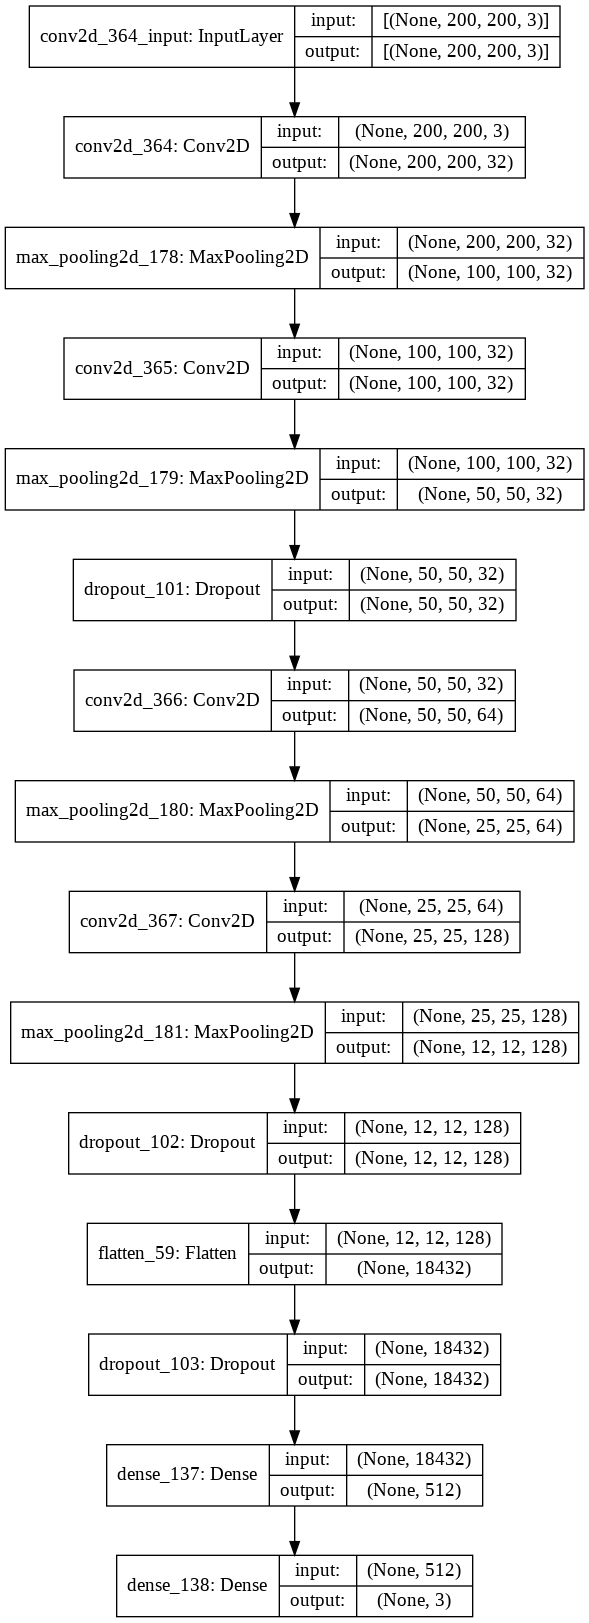

In [564]:
plot_model(model_1, show_shapes=True, show_layer_names=True)

####Test optimizers

######SGD

In [468]:
model_1.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [469]:
history_1_sgd = model_1.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 25s 225ms/step - loss: 1.1009 - accuracy: 0.3362 - val_loss: 1.0865 - val_accuracy: 0.4510
Epoch 2/15
110/110 [==============================] - 25s 223ms/step - loss: 1.0851 - accuracy: 0.3968 - val_loss: 1.0476 - val_accuracy: 0.4601
Epoch 3/15
110/110 [==============================] - 25s 225ms/step - loss: 1.0599 - accuracy: 0.4560 - val_loss: 0.9967 - val_accuracy: 0.4396
Epoch 4/15
110/110 [==============================] - 25s 226ms/step - loss: 1.0061 - accuracy: 0.4917 - val_loss: 0.9068 - val_accuracy: 0.6014
Epoch 5/15
110/110 [==============================] - 25s 229ms/step - loss: 0.9464 - accuracy: 0.5676 - val_loss: 0.8289 - val_accuracy: 0.6834
Epoch 6/15
110/110 [==============================] - 25s 228ms/step - loss: 0.8888 - accuracy: 0.6107 - val_loss: 0.7452 - val_accuracy: 0.7084
Epoch 7/15
110/110 [==============================] - 25s 229ms/step - loss: 0.7646 - accuracy: 0.6876 - val_loss: 0.5741 - val_ac

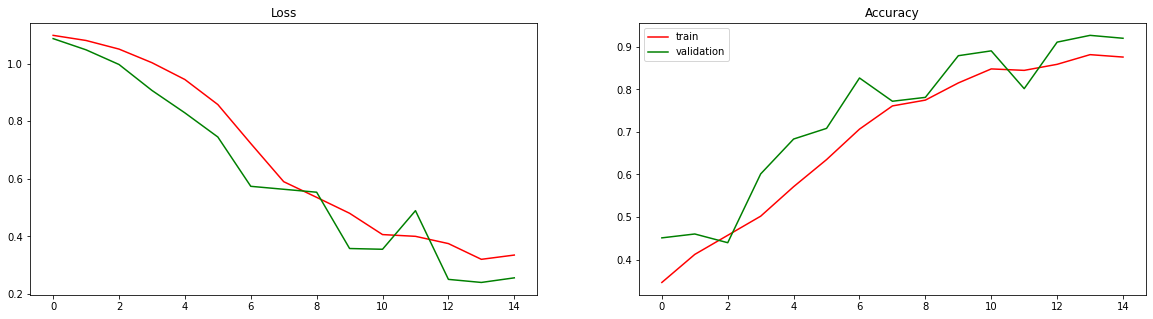

In [470]:
show_accuracy_and_loss_trands(history_1_sgd)

In [471]:
model_1_sgd_acc = show_eval(model_1, val)

28/28 [==============================] - 5s 166ms/step - loss: 0.2372 - accuracy: 0.9248
Accuracy: 92


######ADAM

In [ ]:
model_1.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1_adam = model_1.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 27s 237ms/step - loss: 1.4379 - accuracy: 0.3463 - val_loss: 1.0371 - val_accuracy: 0.4647
Epoch 2/15
110/110 [==============================] - 26s 238ms/step - loss: 0.9661 - accuracy: 0.5176 - val_loss: 0.5233 - val_accuracy: 0.8109
Epoch 3/15
110/110 [==============================] - 25s 232ms/step - loss: 0.6017 - accuracy: 0.7401 - val_loss: 0.4332 - val_accuracy: 0.8497
Epoch 4/15
110/110 [==============================] - 26s 234ms/step - loss: 0.4757 - accuracy: 0.8183 - val_loss: 0.3543 - val_accuracy: 0.8679
Epoch 5/15
110/110 [==============================] - 26s 232ms/step - loss: 0.4011 - accuracy: 0.8407 - val_loss: 0.3208 - val_accuracy: 0.8747
Epoch 6/15
110/110 [==============================] - 25s 230ms/step - loss: 0.3814 - accuracy: 0.8641 - val_loss: 0.2940 - val_accuracy: 0.9134
Epoch 7/15
110/110 [==============================] - 26s 233ms/step - loss: 0.3735 - accuracy: 0.8629 - val_loss: 0.2283 - val_ac

No handles with labels found to put in legend.


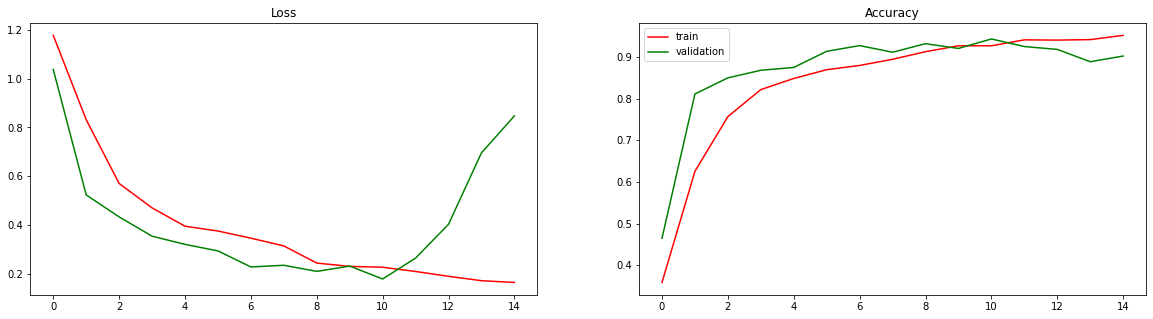

In [ ]:
show_accuracy_and_loss_trands(history_1_adam)

In [ ]:
model_1_adam_acc = show_eval(model_1, val)

28/28 [==============================] - 5s 178ms/step - loss: 0.8026 - accuracy: 0.9134
Accuracy: 91


######RMSprop

In [ ]:
model_1.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1_rmsprop = model_1.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 25s 217ms/step - loss: 0.1374 - accuracy: 0.9609 - val_loss: 0.6352 - val_accuracy: 0.9271
Epoch 2/15
110/110 [==============================] - 24s 216ms/step - loss: 0.0841 - accuracy: 0.9685 - val_loss: 0.3050 - val_accuracy: 0.9317
Epoch 3/15
110/110 [==============================] - 24s 221ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.3156 - val_accuracy: 0.9385
Epoch 4/15
110/110 [==============================] - 24s 214ms/step - loss: 0.0744 - accuracy: 0.9756 - val_loss: 0.2742 - val_accuracy: 0.9339
Epoch 5/15
110/110 [==============================] - 24s 217ms/step - loss: 0.0785 - accuracy: 0.9747 - val_loss: 0.6870 - val_accuracy: 0.9203
Epoch 6/15
110/110 [==============================] - 24s 216ms/step - loss: 0.0761 - accuracy: 0.9757 - val_loss: 0.2693 - val_accuracy: 0.9271
Epoch 7/15
110/110 [==============================] - 24s 216ms/step - loss: 0.0929 - accuracy: 0.9787 - val_loss: 0.4771 - val_ac

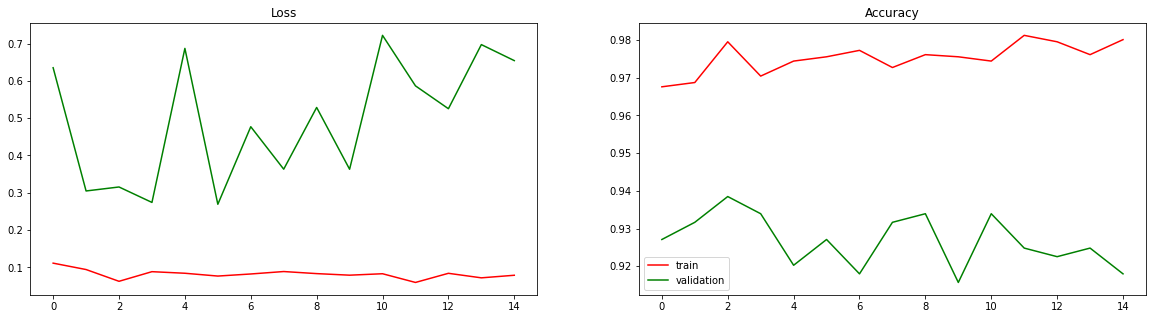

In [ ]:
show_accuracy_and_loss_trands(history_1_rmsprop)

In [ ]:
model_1_rmsprop_acc = show_eval(model_1, val)

28/28 [==============================] - 5s 163ms/step - loss: 0.6695 - accuracy: 0.9157
Accuracy: 92


####Test data

######SGD

In [ ]:
model_1.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1_sgd_2 = model_1.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 23s 203ms/step - loss: 0.2565 - accuracy: 0.9276 - val_loss: 0.5107 - val_accuracy: 0.9112
Epoch 2/15
110/110 [==============================] - 22s 201ms/step - loss: 0.0878 - accuracy: 0.9660 - val_loss: 0.4233 - val_accuracy: 0.9180
Epoch 3/15
110/110 [==============================] - 22s 200ms/step - loss: 0.0613 - accuracy: 0.9802 - val_loss: 0.4573 - val_accuracy: 0.9134
Epoch 4/15
110/110 [==============================] - 23s 205ms/step - loss: 0.0596 - accuracy: 0.9772 - val_loss: 0.4590 - val_accuracy: 0.9157
Epoch 5/15
110/110 [==============================] - 22s 199ms/step - loss: 0.0585 - accuracy: 0.9776 - val_loss: 0.4486 - val_accuracy: 0.9134
Epoch 6/15
110/110 [==============================] - 22s 200ms/step - loss: 0.0849 - accuracy: 0.9733 - val_loss: 0.4797 - val_accuracy: 0.9294
Epoch 7/15
110/110 [==============================] - 22s 201ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.5306 - val_ac

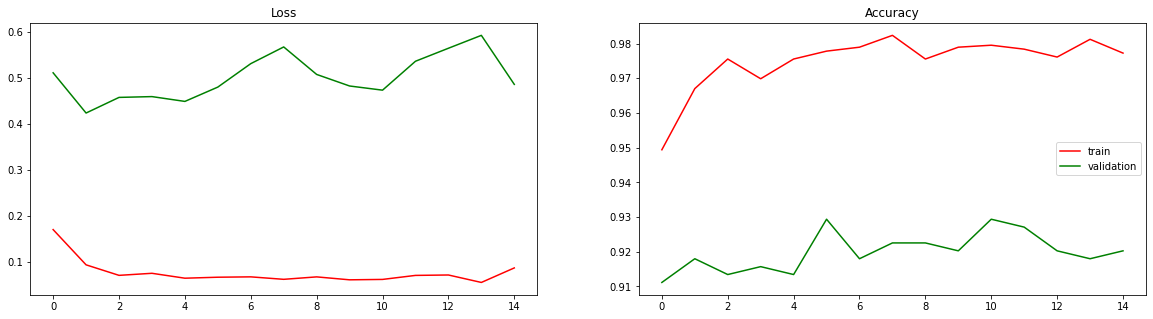

In [ ]:
show_accuracy_and_loss_trands(history_1_sgd_2)

In [ ]:
model_1_sgd_2_acc = show_eval(model_1, pre_val)

28/28 [==============================] - 4s 152ms/step - loss: 0.5541 - accuracy: 0.9134
Accuracy: 91


######ADAM

In [ ]:
model_1.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1_adam_2 = model_1.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 25s 220ms/step - loss: 0.1535 - accuracy: 0.9595 - val_loss: 0.7534 - val_accuracy: 0.8998
Epoch 2/15
110/110 [==============================] - 24s 219ms/step - loss: 0.1599 - accuracy: 0.9473 - val_loss: 0.8049 - val_accuracy: 0.8884
Epoch 3/15
110/110 [==============================] - 24s 219ms/step - loss: 0.1090 - accuracy: 0.9622 - val_loss: 0.3444 - val_accuracy: 0.8815
Epoch 4/15
110/110 [==============================] - 24s 217ms/step - loss: 0.1218 - accuracy: 0.9594 - val_loss: 0.7733 - val_accuracy: 0.8428
Epoch 5/15
110/110 [==============================] - 24s 220ms/step - loss: 0.1396 - accuracy: 0.9588 - val_loss: 0.4144 - val_accuracy: 0.9226
Epoch 6/15
110/110 [==============================] - 24s 220ms/step - loss: 0.1360 - accuracy: 0.9605 - val_loss: 0.4333 - val_accuracy: 0.9203
Epoch 7/15
110/110 [==============================] - 24s 220ms/step - loss: 0.0964 - accuracy: 0.9630 - val_loss: 0.4852 - val_ac

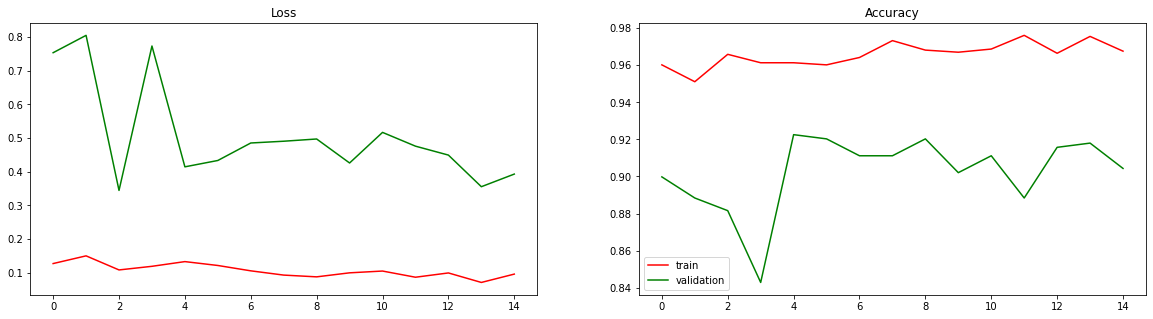

In [ ]:
show_accuracy_and_loss_trands(history_1_adam_2)

In [ ]:
model_1_adam_2_acc = show_eval(model_1, pre_val)

28/28 [==============================] - 4s 151ms/step - loss: 0.8851 - accuracy: 0.7986
Accuracy: 91


######RMSprop

In [ ]:
model_1.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1_rmsprop_2 = model_1.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 23s 205ms/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.3737 - val_accuracy: 0.9180
Epoch 2/15
110/110 [==============================] - 23s 205ms/step - loss: 0.1094 - accuracy: 0.9627 - val_loss: 0.5021 - val_accuracy: 0.8519
Epoch 3/15
110/110 [==============================] - 23s 205ms/step - loss: 0.0896 - accuracy: 0.9731 - val_loss: 0.3709 - val_accuracy: 0.9180
Epoch 4/15
110/110 [==============================] - 22s 202ms/step - loss: 0.0759 - accuracy: 0.9772 - val_loss: 0.4990 - val_accuracy: 0.9248
Epoch 5/15
110/110 [==============================] - 22s 201ms/step - loss: 0.1189 - accuracy: 0.9629 - val_loss: 0.8515 - val_accuracy: 0.8565
Epoch 6/15
110/110 [==============================] - 22s 203ms/step - loss: 0.0811 - accuracy: 0.9719 - val_loss: 0.5832 - val_accuracy: 0.8952
Epoch 7/15
110/110 [==============================] - 22s 202ms/step - loss: 0.0728 - accuracy: 0.9817 - val_loss: 0.4783 - val_ac

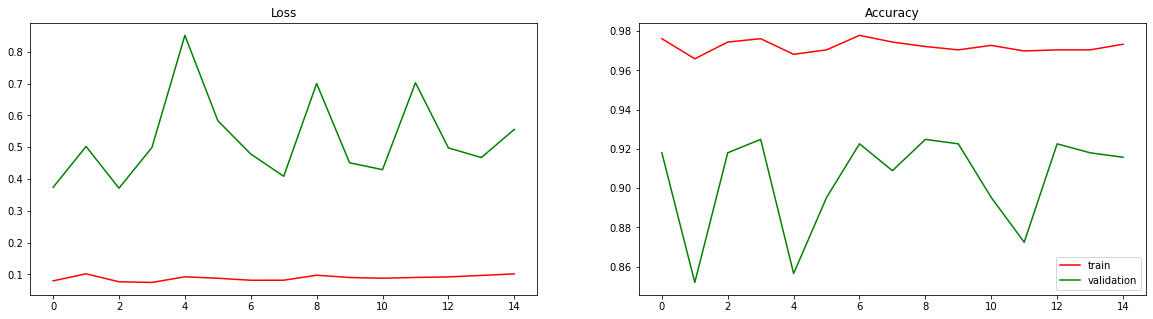

In [ ]:
show_accuracy_and_loss_trands(history_1_rmsprop_2)

In [ ]:
model_1_rmsprop_2_acc = show_eval(model_1, pre_val)

28/28 [==============================] - 4s 153ms/step - loss: 0.6458 - accuracy: 0.9043
Accuracy: 90


###Model2

Setting the first few layers to not trainable so weights wont be tweaked
After that, allow all other layers to be trained on the RPS images


In [28]:
pretrained = tf.keras.applications.InceptionResNetV2(
    input_shape=(pixels,pixels,channels), include_top=False, weights='imagenet', pooling='max'
)

219062272/219055592 [==============================] - 2s 0us/step


In [29]:
model_2 = Sequential([
     pretrained, 
     Dense(256), 
     Dense(num_classes, activation='softmax')]
)

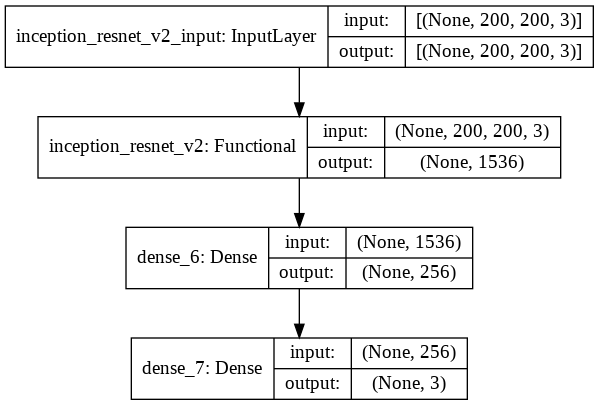

In [30]:
plot_model(model_2, show_shapes=True, show_layer_names=True)

####Test optimizers

######SGD

In [31]:
model_2.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history_2_sgd = model_2.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 53s 356ms/step - loss: 2.2811 - accuracy: 0.7010 - val_loss: 0.2196 - val_accuracy: 0.9180
Epoch 2/15
110/110 [==============================] - 35s 317ms/step - loss: 0.0683 - accuracy: 0.9826 - val_loss: 0.1656 - val_accuracy: 0.9362
Epoch 3/15
110/110 [==============================] - 35s 315ms/step - loss: 0.0612 - accuracy: 0.9792 - val_loss: 0.2351 - val_accuracy: 0.9226
Epoch 4/15
110/110 [==============================] - 34s 311ms/step - loss: 0.0395 - accuracy: 0.9858 - val_loss: 0.1970 - val_accuracy: 0.9317
Epoch 5/15
110/110 [==============================] - 34s 312ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.2263 - val_accuracy: 0.9157
Epoch 6/15
110/110 [==============================] - 35s 314ms/step - loss: 0.0267 - accuracy: 0.9884 - val_loss: 0.0805 - val_accuracy: 0.9658
Epoch 7/15
110/110 [==============================] - 34s 309ms/step - loss: 0.0222 - accuracy: 0.9889 - val_loss: 0.1286 - val_ac

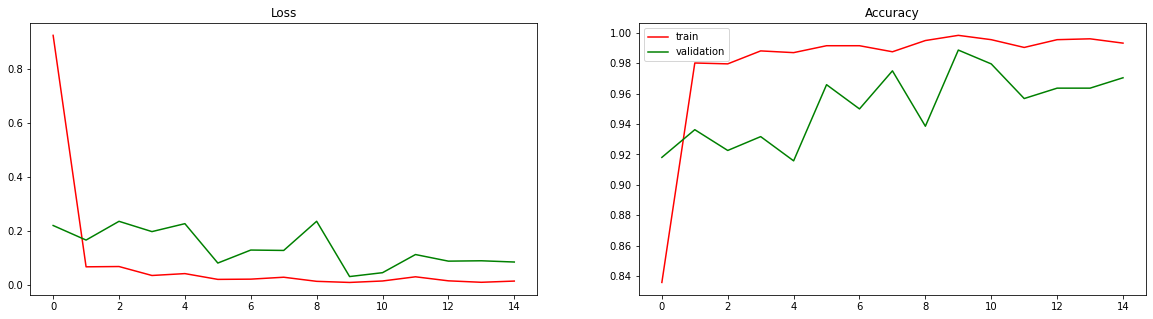

In [33]:
show_accuracy_and_loss_trands(history_2_sgd)

In [34]:
model_2_sgd_acc = show_eval(model_2, val)

28/28 [==============================] - 6s 208ms/step - loss: 0.1279 - accuracy: 0.9658
Accuracy: 97


######ADAM

In [35]:
model_2.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
with tf.device('/device:GPU:0'):
  history_2_adam = model_2.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 54s 350ms/step - loss: 19.1536 - accuracy: 0.3936 - val_loss: 5345.5425 - val_accuracy: 0.3781
Epoch 2/15
110/110 [==============================] - 35s 318ms/step - loss: 1.0801 - accuracy: 0.4897 - val_loss: 2123243.7500 - val_accuracy: 0.3417
Epoch 3/15
110/110 [==============================] - 35s 316ms/step - loss: 0.9664 - accuracy: 0.5283 - val_loss: 33.5425 - val_accuracy: 0.3554
Epoch 4/15
110/110 [==============================] - 35s 315ms/step - loss: 0.7529 - accuracy: 0.6436 - val_loss: 27.8229 - val_accuracy: 0.3462
Epoch 5/15
110/110 [==============================] - 35s 314ms/step - loss: 0.4837 - accuracy: 0.8069 - val_loss: 0.8454 - val_accuracy: 0.7289
Epoch 6/15
110/110 [==============================] - 35s 313ms/step - loss: 0.3552 - accuracy: 0.8804 - val_loss: 0.5681 - val_accuracy: 0.7722
Epoch 7/15
110/110 [==============================] - 35s 313ms/step - loss: 0.1879 - accuracy: 0.9421 - val_loss: 0.4

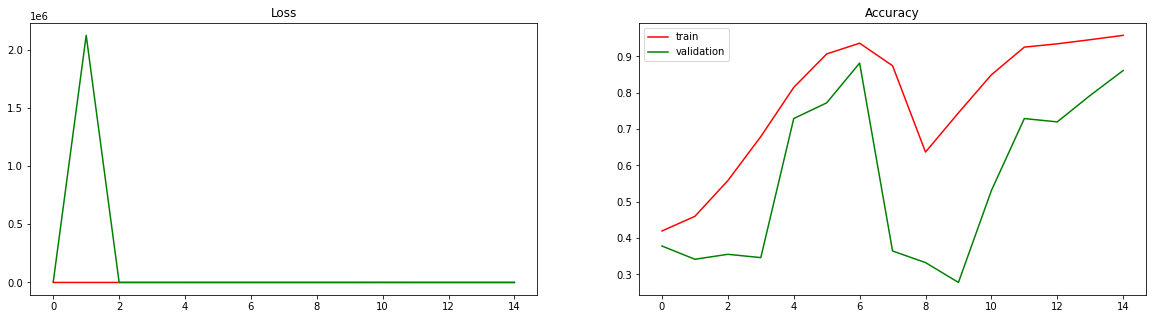

In [37]:
show_accuracy_and_loss_trands(history_2_adam)

In [38]:
model_2_adam_acc = show_eval(model_2, val)

28/28 [==============================] - 7s 206ms/step - loss: 2.4481 - accuracy: 0.8087
Accuracy: 81


######RMSprop

In [39]:
model_2.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history_2_rmsprop = model_2.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 64s 350ms/step - loss: 56.8258 - accuracy: 0.4036 - val_loss: 56882.4453 - val_accuracy: 0.3440
Epoch 2/15
110/110 [==============================] - 35s 317ms/step - loss: 2.8568 - accuracy: 0.3616 - val_loss: 15588.8506 - val_accuracy: 0.3508
Epoch 3/15
110/110 [==============================] - 35s 320ms/step - loss: 0.8249 - accuracy: 0.6124 - val_loss: 142399600.0000 - val_accuracy: 0.3781
Epoch 4/15
110/110 [==============================] - 35s 318ms/step - loss: 0.7462 - accuracy: 0.6164 - val_loss: 25.3165 - val_accuracy: 0.4601
Epoch 5/15
110/110 [==============================] - 36s 322ms/step - loss: 0.6461 - accuracy: 0.6589 - val_loss: 41.7423 - val_accuracy: 0.4237
Epoch 6/15
110/110 [==============================] - 36s 322ms/step - loss: 0.5489 - accuracy: 0.6744 - val_loss: 1.3526 - val_accuracy: 0.6925
Epoch 7/15
110/110 [==============================] - 36s 325ms/step - loss: 0.2852 - accuracy: 0.8941 - val_lo

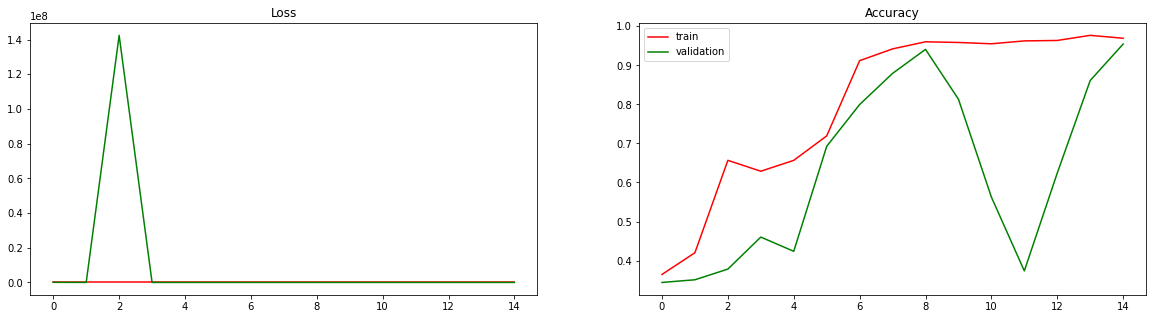

In [41]:
show_accuracy_and_loss_trands(history_2_rmsprop)

In [42]:
model_2_rmsprop_acc = show_eval(model_2, val)

28/28 [==============================] - 6s 207ms/step - loss: 0.6813 - accuracy: 0.9453
Accuracy: 95


####Test data

######SGD

In [43]:
model_2.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history_2_sgd_2 = model_2.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 515s 5s/step - loss: 3.6860 - accuracy: 0.4851 - val_loss: 1.3281 - val_accuracy: 0.4146
Epoch 2/15
110/110 [==============================] - 33s 299ms/step - loss: 1.1400 - accuracy: 0.5215 - val_loss: 1.1308 - val_accuracy: 0.4715
Epoch 3/15
110/110 [==============================] - 33s 297ms/step - loss: 0.9903 - accuracy: 0.5277 - val_loss: 1.4539 - val_accuracy: 0.4533
Epoch 4/15
110/110 [==============================] - 33s 298ms/step - loss: 1.0092 - accuracy: 0.5050 - val_loss: 1.1000 - val_accuracy: 0.5057
Epoch 5/15
110/110 [==============================] - 33s 297ms/step - loss: 0.9654 - accuracy: 0.5526 - val_loss: 1.0164 - val_accuracy: 0.4897
Epoch 6/15
110/110 [==============================] - 33s 299ms/step - loss: 0.9390 - accuracy: 0.5825 - val_loss: 1.1343 - val_accuracy: 0.5148
Epoch 7/15
110/110 [==============================] - 33s 297ms/step - loss: 0.9548 - accuracy: 0.5343 - val_loss: 1.0214 - val_accu

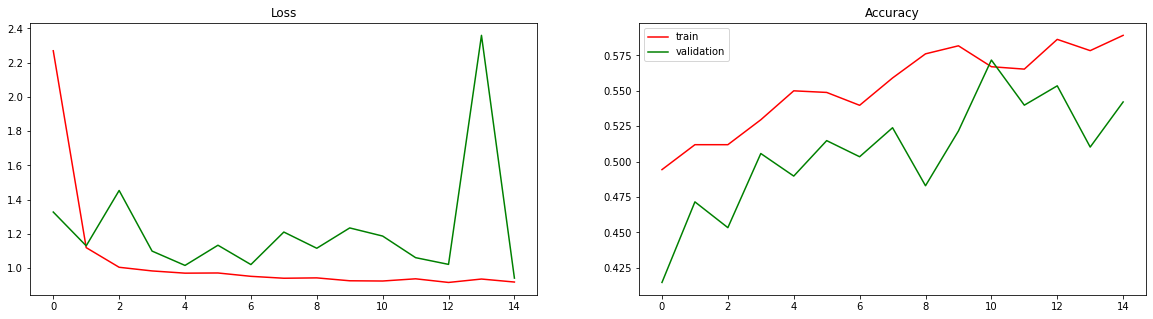

In [45]:
show_accuracy_and_loss_trands(history_2_sgd_2)

In [46]:
model_2_sgd_2_acc = show_eval(model_2, pre_val)

28/28 [==============================] - 5s 190ms/step - loss: 1.0086 - accuracy: 0.5649
Accuracy: 56


######ADAM

In [48]:
model_2.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history_2_adam_2 = model_2.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 49s 323ms/step - loss: 1.0241 - accuracy: 0.6396 - val_loss: 2.1830 - val_accuracy: 0.3599
Epoch 2/15
110/110 [==============================] - 32s 293ms/step - loss: 0.3733 - accuracy: 0.8687 - val_loss: 2.4570 - val_accuracy: 0.4624
Epoch 3/15
110/110 [==============================] - 32s 293ms/step - loss: 0.2655 - accuracy: 0.9160 - val_loss: 0.8233 - val_accuracy: 0.7221
Epoch 4/15
110/110 [==============================] - 33s 298ms/step - loss: 0.1506 - accuracy: 0.9618 - val_loss: 0.4626 - val_accuracy: 0.8838
Epoch 5/15
110/110 [==============================] - 33s 295ms/step - loss: 0.1328 - accuracy: 0.9610 - val_loss: 0.6553 - val_accuracy: 0.7654
Epoch 6/15
110/110 [==============================] - 33s 298ms/step - loss: 0.1273 - accuracy: 0.9581 - val_loss: 1.9797 - val_accuracy: 0.4146
Epoch 7/15
110/110 [==============================] - 33s 298ms/step - loss: 0.1114 - accuracy: 0.9656 - val_loss: 0.8413 - val_ac

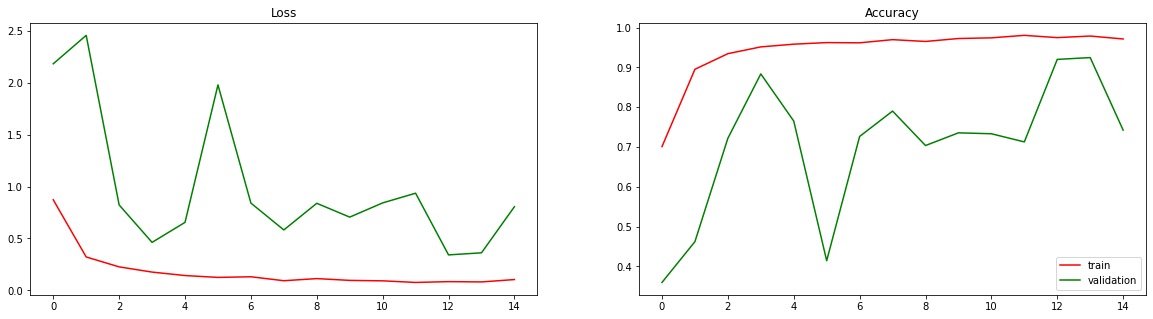

In [50]:
show_accuracy_and_loss_trands(history_2_adam_2)

In [51]:
model_2_adam_2_acc = show_eval(model_2, pre_val)

28/28 [==============================] - 5s 185ms/step - loss: 0.7213 - accuracy: 0.7472
Accuracy: 75


######RMSprop

In [53]:
model_2.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history_2_rmsprop_2 = model_2.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 63s 338ms/step - loss: 0.2594 - accuracy: 0.9237 - val_loss: 1.1222 - val_accuracy: 0.7175
Epoch 2/15
110/110 [==============================] - 34s 308ms/step - loss: 0.1695 - accuracy: 0.9566 - val_loss: 0.6771 - val_accuracy: 0.7813
Epoch 3/15
110/110 [==============================] - 34s 307ms/step - loss: 0.2051 - accuracy: 0.9531 - val_loss: 3.1608 - val_accuracy: 0.6241
Epoch 4/15
110/110 [==============================] - 34s 310ms/step - loss: 0.1699 - accuracy: 0.9630 - val_loss: 0.6912 - val_accuracy: 0.8200
Epoch 5/15
110/110 [==============================] - 34s 311ms/step - loss: 0.1335 - accuracy: 0.9599 - val_loss: 1.2198 - val_accuracy: 0.7358
Epoch 6/15
110/110 [==============================] - 34s 309ms/step - loss: 0.1411 - accuracy: 0.9665 - val_loss: 0.3560 - val_accuracy: 0.9226
Epoch 7/15
110/110 [==============================] - 34s 310ms/step - loss: 0.2022 - accuracy: 0.9770 - val_loss: 0.8461 - val_ac

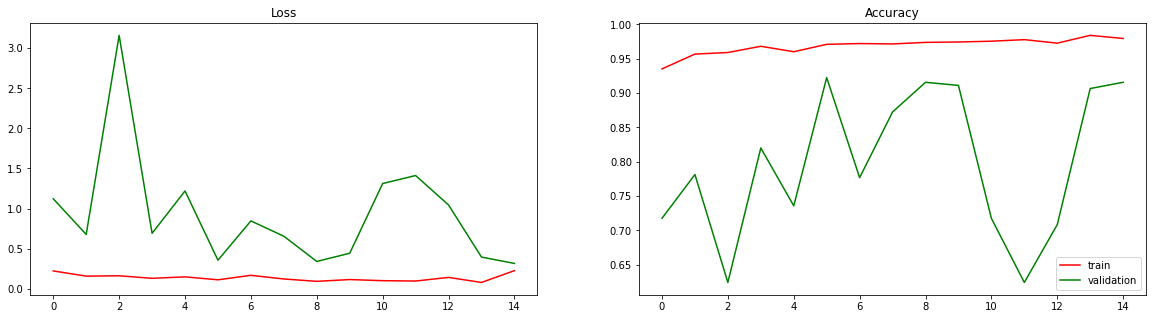

In [55]:
show_accuracy_and_loss_trands(history_2_rmsprop_2)

In [56]:
model_2_rmsprop_2_acc = show_eval(model_2, pre_val)

28/28 [==============================] - 5s 179ms/step - loss: 0.2828 - accuracy: 0.9339
Accuracy: 93


In [261]:
del(model_1)
del(model_2)

###Model3

In [398]:
pretrained = DenseNet201(weights='imagenet',include_top=False,input_shape=(pixels,pixels, channels))
for layer in pretrained.layers:
 layer.trainable=False

In [270]:
model_3 = Sequential(
    [
      pretrained,
      Flatten(),
      Dropout(0.3),
      Dense(num_classes, activation='softmax')
    ]
)

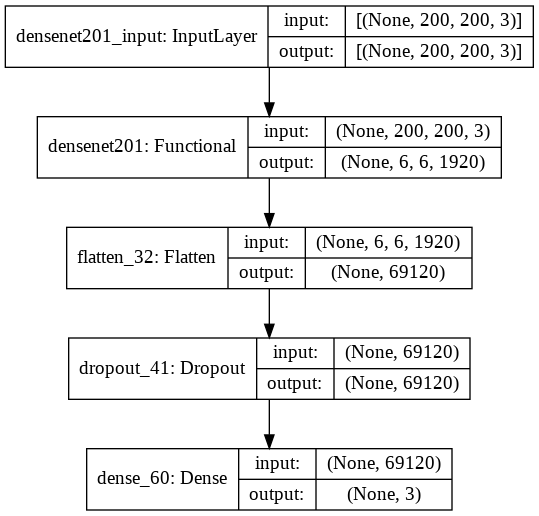

In [271]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

####Test optimizers

######SGD

In [255]:
model_3.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [256]:
history_3_sgd = model_3.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 50s 336ms/step - loss: 0.7492 - accuracy: 0.8711 - val_loss: 0.1246 - val_accuracy: 0.9613
Epoch 2/15
110/110 [==============================] - 34s 308ms/step - loss: 0.0415 - accuracy: 0.9909 - val_loss: 0.1355 - val_accuracy: 0.9431
Epoch 3/15
110/110 [==============================] - 34s 309ms/step - loss: 0.0343 - accuracy: 0.9921 - val_loss: 0.0473 - val_accuracy: 0.9932
Epoch 4/15
110/110 [==============================] - 34s 306ms/step - loss: 0.0176 - accuracy: 0.9962 - val_loss: 0.0067 - val_accuracy: 0.9977
Epoch 5/15
110/110 [==============================] - 34s 308ms/step - loss: 0.0357 - accuracy: 0.9907 - val_loss: 0.0421 - val_accuracy: 0.9886
Epoch 6/15
110/110 [==============================] - 34s 309ms/step - loss: 0.0224 - accuracy: 0.9938 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 7/15
110/110 [==============================] - 34s 310ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0163 - val_ac

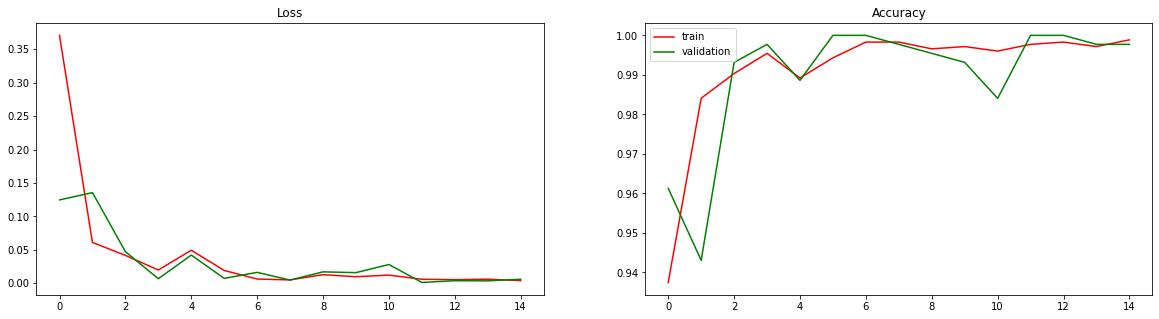

In [257]:
show_accuracy_and_loss_trands(history_3_sgd)

In [258]:
model_3_sgd_acc = show_eval(model_3, val)

28/28 [==============================] - 6s 205ms/step - loss: 0.0054 - accuracy: 1.0000
Accuracy: 100


######ADAM

In [272]:
model_3.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [273]:
history_3_adam = model_3.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 54s 338ms/step - loss: 114.7986 - accuracy: 0.3326 - val_loss: 3882099456.0000 - val_accuracy: 0.3349
Epoch 2/15
110/110 [==============================] - 35s 314ms/step - loss: 8.6694 - accuracy: 0.4410 - val_loss: 63276.7773 - val_accuracy: 0.3440
Epoch 3/15
110/110 [==============================] - 34s 312ms/step - loss: 2.5159 - accuracy: 0.4357 - val_loss: 3990.8184 - val_accuracy: 0.4123
Epoch 4/15
110/110 [==============================] - 34s 311ms/step - loss: 1.5584 - accuracy: 0.5379 - val_loss: 891.0630 - val_accuracy: 0.5604
Epoch 5/15
110/110 [==============================] - 34s 311ms/step - loss: 1.3005 - accuracy: 0.5892 - val_loss: 324.0376 - val_accuracy: 0.6173
Epoch 6/15
110/110 [==============================] - 34s 309ms/step - loss: 0.8371 - accuracy: 0.6639 - val_loss: 206.0263 - val_accuracy: 0.5763
Epoch 7/15
110/110 [==============================] - 34s 311ms/step - loss: 0.7525 - accuracy: 0.7059 - v

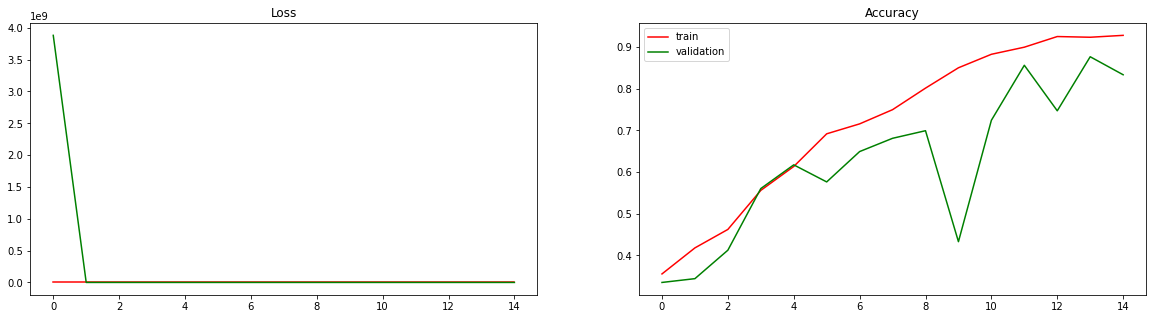

In [274]:
show_accuracy_and_loss_trands(history_3_adam)

In [275]:
model_3_adam_acc = show_eval(model_3, val)

28/28 [==============================] - 6s 203ms/step - loss: 314.7822 - accuracy: 0.8269
Accuracy: 83


######RMSprop

In [276]:
model_3.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [277]:
history_3_rmsprop = model_3.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 67s 344ms/step - loss: 0.8783 - accuracy: 0.7545 - val_loss: 10.3398 - val_accuracy: 0.4715
Epoch 2/15
110/110 [==============================] - 35s 321ms/step - loss: 0.3778 - accuracy: 0.8778 - val_loss: 5.5038 - val_accuracy: 0.5809
Epoch 3/15
110/110 [==============================] - 35s 317ms/step - loss: 0.2779 - accuracy: 0.9159 - val_loss: 21.0500 - val_accuracy: 0.6333
Epoch 4/15
110/110 [==============================] - 35s 320ms/step - loss: 0.2488 - accuracy: 0.9315 - val_loss: 15.4904 - val_accuracy: 0.6948
Epoch 5/15
110/110 [==============================] - 35s 321ms/step - loss: 0.1972 - accuracy: 0.9487 - val_loss: 5.9019 - val_accuracy: 0.8998
Epoch 6/15
110/110 [==============================] - 35s 321ms/step - loss: 0.2006 - accuracy: 0.9502 - val_loss: 27.8688 - val_accuracy: 0.6424
Epoch 7/15
110/110 [==============================] - 35s 320ms/step - loss: 0.1695 - accuracy: 0.9613 - val_loss: 10.9560 - v

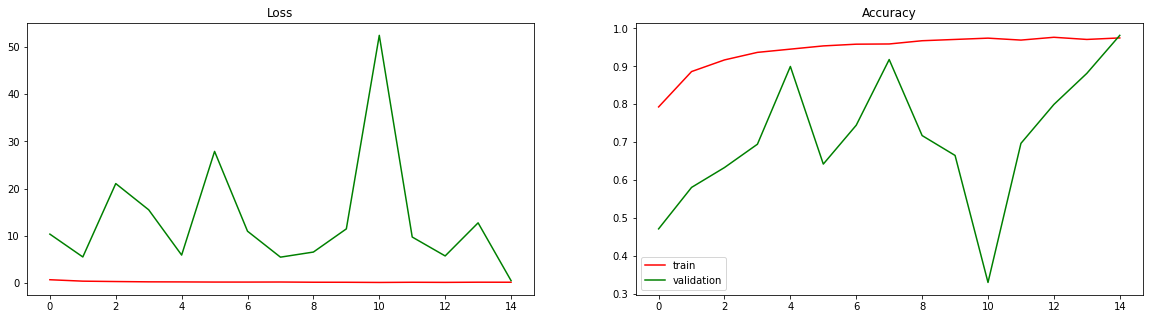

In [278]:
show_accuracy_and_loss_trands(history_3_rmsprop)

In [279]:
model_3_rmsprop_acc = show_eval(model_3, val)

28/28 [==============================] - 6s 198ms/step - loss: 0.5643 - accuracy: 0.9863
Accuracy: 99


####Test data

######SGD

In [280]:
model_3.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [281]:
history_3_sgd_2 = model_3.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 49s 332ms/step - loss: 3.0792 - accuracy: 0.4519 - val_loss: 3.3691 - val_accuracy: 0.4214
Epoch 2/15
110/110 [==============================] - 32s 287ms/step - loss: 1.1044 - accuracy: 0.5308 - val_loss: 2.8187 - val_accuracy: 0.4920
Epoch 3/15
110/110 [==============================] - 32s 291ms/step - loss: 1.0717 - accuracy: 0.5418 - val_loss: 2.7435 - val_accuracy: 0.5649
Epoch 4/15
110/110 [==============================] - 32s 291ms/step - loss: 1.0292 - accuracy: 0.5309 - val_loss: 1.9010 - val_accuracy: 0.6082
Epoch 5/15
110/110 [==============================] - 32s 293ms/step - loss: 0.9658 - accuracy: 0.5865 - val_loss: 2.7296 - val_accuracy: 0.5923
Epoch 6/15
110/110 [==============================] - 33s 296ms/step - loss: 0.9444 - accuracy: 0.5833 - val_loss: 1.9837 - val_accuracy: 0.5923
Epoch 7/15
110/110 [==============================] - 32s 294ms/step - loss: 0.9326 - accuracy: 0.5955 - val_loss: 2.6901 - val_ac

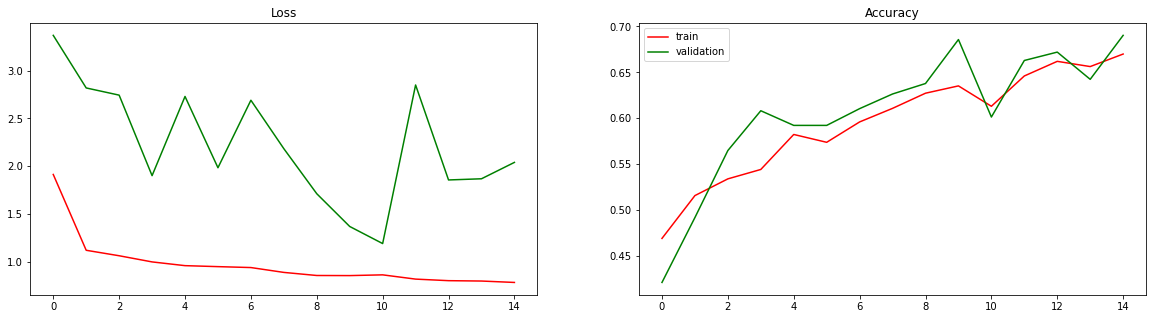

In [282]:
show_accuracy_and_loss_trands(history_3_sgd_2)

In [283]:
model_3_sgd_2_acc = show_eval(model_3, pre_val)

28/28 [==============================] - 5s 179ms/step - loss: 2.3090 - accuracy: 0.6743
Accuracy: 67


######ADAM

In [284]:
model_3.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [285]:
history_3_adam_2 = model_3.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 49s 308ms/step - loss: 0.7917 - accuracy: 0.7072 - val_loss: 1.4497 - val_accuracy: 0.7995
Epoch 2/15
110/110 [==============================] - 31s 284ms/step - loss: 0.4644 - accuracy: 0.8387 - val_loss: 2.4769 - val_accuracy: 0.7745
Epoch 3/15
110/110 [==============================] - 32s 287ms/step - loss: 0.3514 - accuracy: 0.8816 - val_loss: 2.6746 - val_accuracy: 0.8041
Epoch 4/15
110/110 [==============================] - 32s 289ms/step - loss: 0.3162 - accuracy: 0.8872 - val_loss: 2.9218 - val_accuracy: 0.8405
Epoch 5/15
110/110 [==============================] - 32s 287ms/step - loss: 0.2475 - accuracy: 0.9291 - val_loss: 1.3369 - val_accuracy: 0.8633
Epoch 6/15
110/110 [==============================] - 32s 290ms/step - loss: 0.2417 - accuracy: 0.9222 - val_loss: 1.9593 - val_accuracy: 0.8747
Epoch 7/15
110/110 [==============================] - 32s 293ms/step - loss: 0.2132 - accuracy: 0.9364 - val_loss: 2.5715 - val_ac

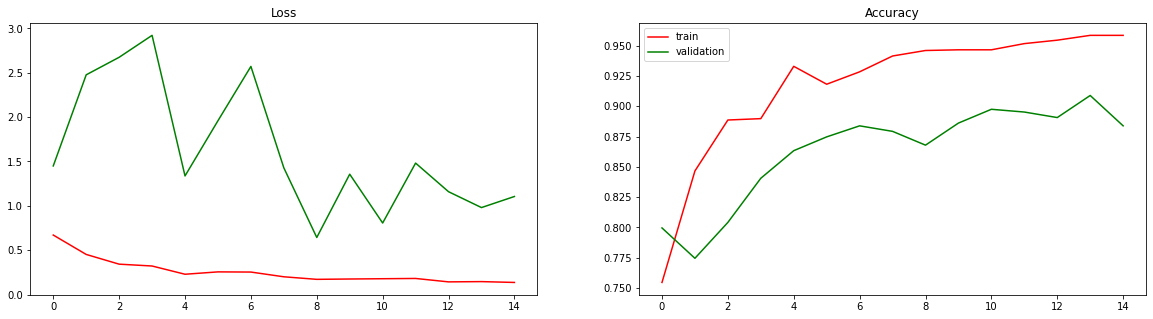

In [286]:
show_accuracy_and_loss_trands(history_3_adam_2)

In [287]:
model_3_adam_2_acc = show_eval(model_3, pre_val)

28/28 [==============================] - 5s 188ms/step - loss: 1.2188 - accuracy: 0.8815
Accuracy: 88


######RMSprop

In [288]:
model_3.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [289]:
history_3_rmsprop_2 = model_3.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 66s 331ms/step - loss: 0.2384 - accuracy: 0.9248 - val_loss: 7.5579 - val_accuracy: 0.5057
Epoch 2/15
110/110 [==============================] - 34s 304ms/step - loss: 0.1959 - accuracy: 0.9398 - val_loss: 1.0374 - val_accuracy: 0.8064
Epoch 3/15
110/110 [==============================] - 33s 304ms/step - loss: 0.1774 - accuracy: 0.9478 - val_loss: 3.5810 - val_accuracy: 0.5558
Epoch 4/15
110/110 [==============================] - 33s 302ms/step - loss: 0.1564 - accuracy: 0.9581 - val_loss: 6.3886 - val_accuracy: 0.6811
Epoch 5/15
110/110 [==============================] - 33s 300ms/step - loss: 0.1906 - accuracy: 0.9413 - val_loss: 1.8580 - val_accuracy: 0.7813
Epoch 6/15
110/110 [==============================] - 32s 293ms/step - loss: 0.1436 - accuracy: 0.9655 - val_loss: 1.1816 - val_accuracy: 0.8383
Epoch 7/15
110/110 [==============================] - 33s 297ms/step - loss: 0.1094 - accuracy: 0.9706 - val_loss: 0.4638 - val_ac

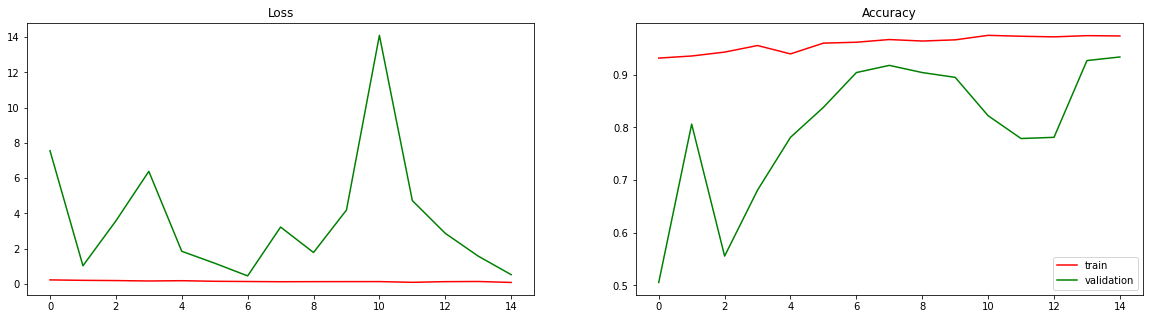

In [290]:
show_accuracy_and_loss_trands(history_3_rmsprop_2)

In [291]:
model_3_rmsprop_2_acc = show_eval(model_3, pre_val)

28/28 [==============================] - 5s 181ms/step - loss: 0.4791 - accuracy: 0.9157
Accuracy: 92


In [292]:
del(model_3)

###Model4

In [400]:
pretrained = tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, pooling='max', input_shape=(pixels,pixels,channels))
for layer in pretrained.layers:
 layer.trainable=False

In [401]:
model_4 = Sequential([
     pretrained,
     Dense(num_classes, activation='softmax')]
)

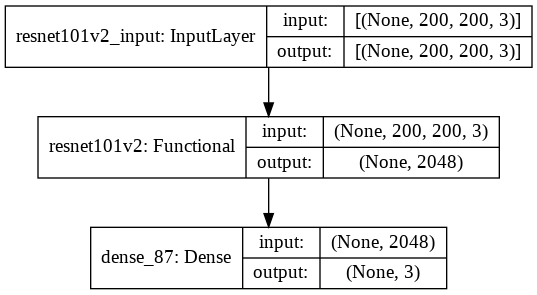

In [402]:
plot_model(model_4, show_shapes=True, show_layer_names=True)

####Test optimizers

######SGD

In [407]:
model_4.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [408]:
history_4_sgd = model_4.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 33s 256ms/step - loss: 0.2374 - accuracy: 0.9921 - val_loss: 7.9855 - val_accuracy: 0.9544
Epoch 2/15
110/110 [==============================] - 27s 248ms/step - loss: 0.7664 - accuracy: 0.9841 - val_loss: 6.7795 - val_accuracy: 0.9590
Epoch 3/15
110/110 [==============================] - 27s 243ms/step - loss: 0.1942 - accuracy: 0.9982 - val_loss: 3.8649 - val_accuracy: 0.9658
Epoch 4/15
110/110 [==============================] - 27s 242ms/step - loss: 0.2884 - accuracy: 0.9932 - val_loss: 8.9594 - val_accuracy: 0.9613
Epoch 5/15
110/110 [==============================] - 27s 244ms/step - loss: 0.1403 - accuracy: 0.9985 - val_loss: 8.9438 - val_accuracy: 0.9567
Epoch 6/15
110/110 [==============================] - 27s 243ms/step - loss: 0.1496 - accuracy: 0.9964 - val_loss: 7.3167 - val_accuracy: 0.9613
Epoch 7/15
110/110 [==============================] - 27s 243ms/step - loss: 0.4995 - accuracy: 0.9880 - val_loss: 4.0023 - val_ac

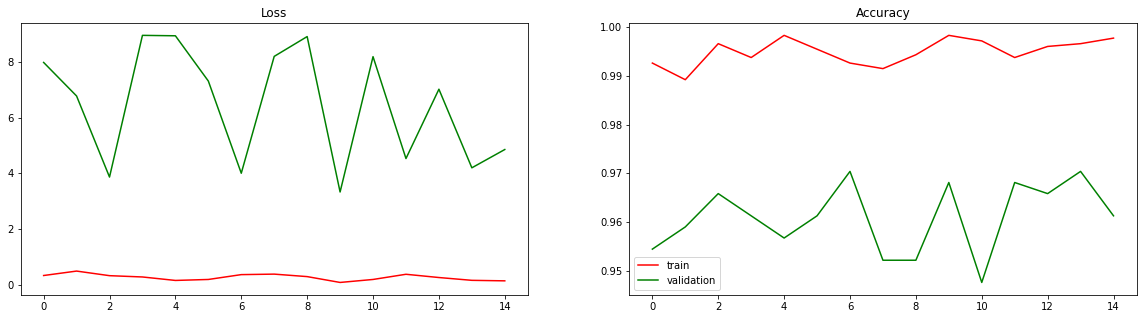

In [409]:
show_accuracy_and_loss_trands(history_4_sgd)

In [410]:
model_4_sgd_acc = show_eval(model_4, val)

28/28 [==============================] - 5s 188ms/step - loss: 8.1134 - accuracy: 0.9590
Accuracy: 96


######ADAM

In [403]:
model_4.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [404]:
history_4_adam = model_4.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 33s 256ms/step - loss: 14.1884 - accuracy: 0.8322 - val_loss: 16.4328 - val_accuracy: 0.9271
Epoch 2/15
110/110 [==============================] - 27s 243ms/step - loss: 1.7620 - accuracy: 0.9772 - val_loss: 17.3209 - val_accuracy: 0.9385
Epoch 3/15
110/110 [==============================] - 27s 243ms/step - loss: 1.3295 - accuracy: 0.9795 - val_loss: 8.0772 - val_accuracy: 0.9453
Epoch 4/15
110/110 [==============================] - 27s 243ms/step - loss: 0.9914 - accuracy: 0.9803 - val_loss: 15.3010 - val_accuracy: 0.9294
Epoch 5/15
110/110 [==============================] - 27s 243ms/step - loss: 1.4027 - accuracy: 0.9732 - val_loss: 11.5247 - val_accuracy: 0.9271
Epoch 6/15
110/110 [==============================] - 27s 246ms/step - loss: 1.0890 - accuracy: 0.9881 - val_loss: 17.4490 - val_accuracy: 0.9408
Epoch 7/15
110/110 [==============================] - 27s 244ms/step - loss: 1.3229 - accuracy: 0.9836 - val_loss: 12.4286 -

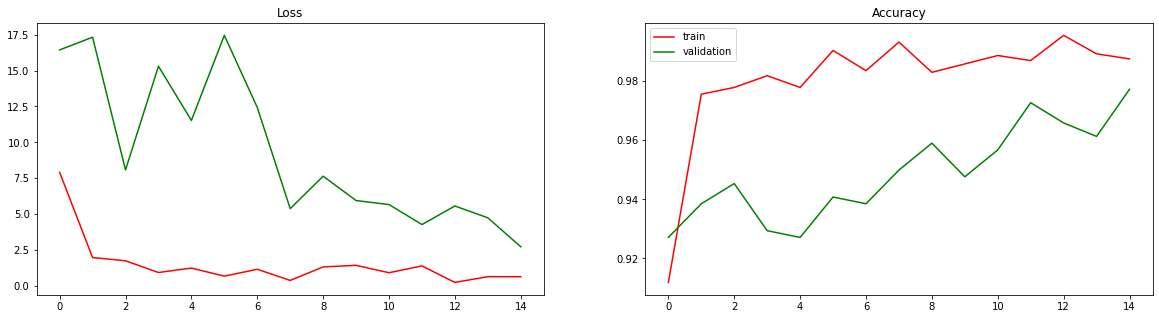

In [405]:
show_accuracy_and_loss_trands(history_4_adam)

In [406]:
model_4_adam_acc = show_eval(model_4, val)

28/28 [==============================] - 5s 191ms/step - loss: 6.4988 - accuracy: 0.9613
Accuracy: 96


######RMSprop

In [411]:
model_4.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [412]:
history_4_rmsprop = model_4.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 36s 255ms/step - loss: 0.4190 - accuracy: 0.9951 - val_loss: 4.4962 - val_accuracy: 0.9658
Epoch 2/15
110/110 [==============================] - 27s 243ms/step - loss: 0.3853 - accuracy: 0.9920 - val_loss: 14.2596 - val_accuracy: 0.9362
Epoch 3/15
110/110 [==============================] - 27s 241ms/step - loss: 0.6428 - accuracy: 0.9909 - val_loss: 11.2929 - val_accuracy: 0.9157
Epoch 4/15
110/110 [==============================] - 26s 240ms/step - loss: 0.9299 - accuracy: 0.9879 - val_loss: 3.5728 - val_accuracy: 0.9636
Epoch 5/15
110/110 [==============================] - 27s 241ms/step - loss: 0.2324 - accuracy: 0.9950 - val_loss: 4.5164 - val_accuracy: 0.9704
Epoch 6/15
110/110 [==============================] - 26s 241ms/step - loss: 0.2978 - accuracy: 0.9931 - val_loss: 4.9289 - val_accuracy: 0.9613
Epoch 7/15
110/110 [==============================] - 27s 241ms/step - loss: 0.7428 - accuracy: 0.9913 - val_loss: 3.0482 - val_

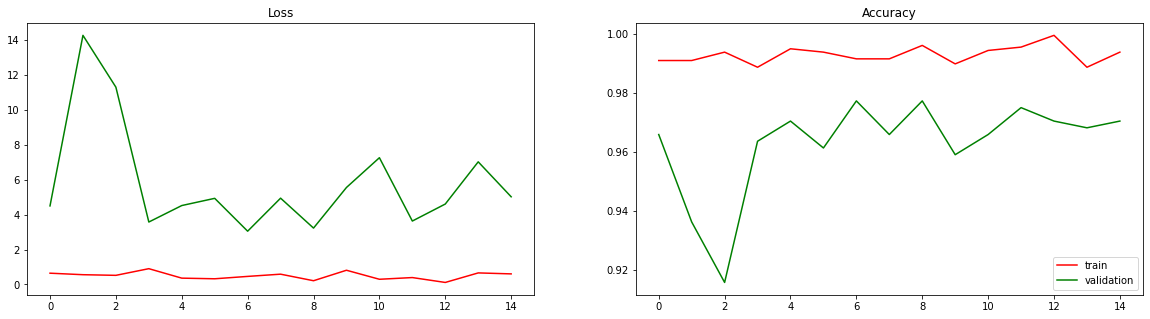

In [413]:
show_accuracy_and_loss_trands(history_4_rmsprop)

In [414]:
model_4_rmsprop_acc = show_eval(model_4, val)

28/28 [==============================] - 5s 186ms/step - loss: 6.5327 - accuracy: 0.9658
Accuracy: 97


####Test data

 ###### SGD

In [415]:
model_4.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [416]:
history_4_sgd_2 = model_4.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 31s 240ms/step - loss: 5.9141 - accuracy: 0.9466 - val_loss: 4.1434 - val_accuracy: 0.9544
Epoch 2/15
110/110 [==============================] - 25s 229ms/step - loss: 2.6840 - accuracy: 0.9656 - val_loss: 6.8661 - val_accuracy: 0.9385
Epoch 3/15
110/110 [==============================] - 25s 225ms/step - loss: 1.8847 - accuracy: 0.9699 - val_loss: 6.0908 - val_accuracy: 0.9362
Epoch 4/15
110/110 [==============================] - 25s 227ms/step - loss: 2.2733 - accuracy: 0.9742 - val_loss: 6.5909 - val_accuracy: 0.9567
Epoch 5/15
110/110 [==============================] - 25s 225ms/step - loss: 0.8636 - accuracy: 0.9868 - val_loss: 4.3038 - val_accuracy: 0.9636
Epoch 6/15
110/110 [==============================] - 25s 227ms/step - loss: 2.2413 - accuracy: 0.9728 - val_loss: 3.9083 - val_accuracy: 0.9613
Epoch 7/15
110/110 [==============================] - 25s 227ms/step - loss: 2.0078 - accuracy: 0.9627 - val_loss: 4.8497 - val_ac

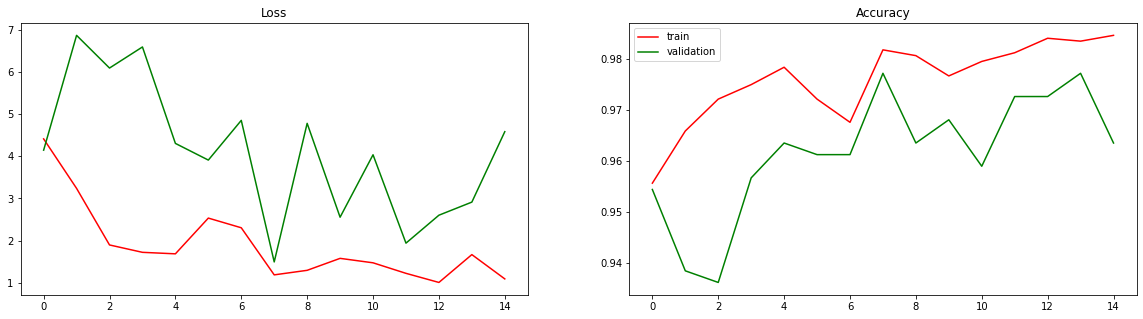

In [417]:
show_accuracy_and_loss_trands(history_4_sgd_2)

In [418]:
model_4_sgd_2_acc = show_eval(model_4, pre_val)

28/28 [==============================] - 5s 178ms/step - loss: 5.2727 - accuracy: 0.9453
Accuracy: 95


######ADAM

In [419]:
model_4.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [420]:
history_4_adam_2 = model_4.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 31s 242ms/step - loss: 1.4098 - accuracy: 0.9778 - val_loss: 4.3860 - val_accuracy: 0.9590
Epoch 2/15
110/110 [==============================] - 25s 226ms/step - loss: 0.7125 - accuracy: 0.9816 - val_loss: 5.3891 - val_accuracy: 0.9522
Epoch 3/15
110/110 [==============================] - 25s 228ms/step - loss: 1.2389 - accuracy: 0.9820 - val_loss: 8.7882 - val_accuracy: 0.9294
Epoch 4/15
110/110 [==============================] - 25s 227ms/step - loss: 1.5756 - accuracy: 0.9821 - val_loss: 2.6146 - val_accuracy: 0.9681
Epoch 5/15
110/110 [==============================] - 25s 227ms/step - loss: 1.6997 - accuracy: 0.9778 - val_loss: 8.3395 - val_accuracy: 0.9453
Epoch 6/15
110/110 [==============================] - 25s 227ms/step - loss: 2.2257 - accuracy: 0.9793 - val_loss: 4.0202 - val_accuracy: 0.9704
Epoch 7/15
110/110 [==============================] - 25s 227ms/step - loss: 1.2314 - accuracy: 0.9739 - val_loss: 3.5454 - val_ac

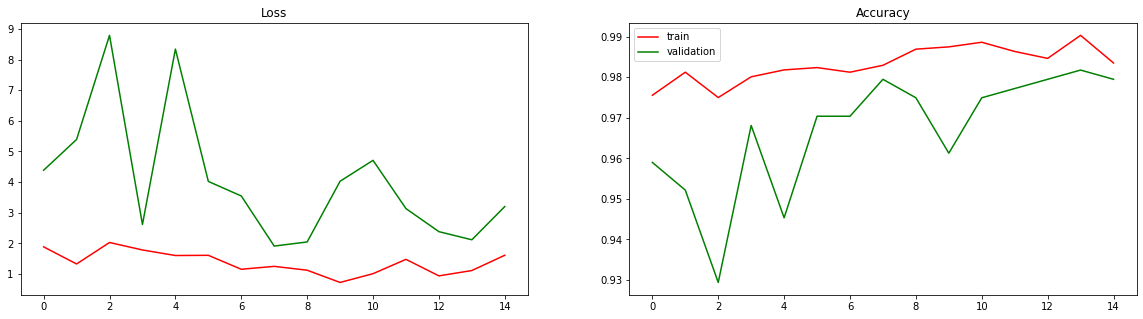

In [421]:
show_accuracy_and_loss_trands(history_4_adam_2)

In [422]:
model_4_adam_2_acc = show_eval(model_4, pre_val)

28/28 [==============================] - 5s 177ms/step - loss: 3.9736 - accuracy: 0.9704
Accuracy: 97


######RMSprop

In [423]:
model_4.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [424]:
history_4_rmsprop_2 = model_4.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 31s 241ms/step - loss: 1.0166 - accuracy: 0.9870 - val_loss: 2.2994 - val_accuracy: 0.9704
Epoch 2/15
110/110 [==============================] - 25s 228ms/step - loss: 0.6065 - accuracy: 0.9908 - val_loss: 5.3328 - val_accuracy: 0.9636
Epoch 3/15
110/110 [==============================] - 25s 227ms/step - loss: 0.8400 - accuracy: 0.9925 - val_loss: 4.1252 - val_accuracy: 0.9704
Epoch 4/15
110/110 [==============================] - 25s 227ms/step - loss: 0.9028 - accuracy: 0.9886 - val_loss: 7.2247 - val_accuracy: 0.9613
Epoch 5/15
110/110 [==============================] - 25s 228ms/step - loss: 1.0339 - accuracy: 0.9917 - val_loss: 4.6212 - val_accuracy: 0.9704
Epoch 6/15
110/110 [==============================] - 25s 227ms/step - loss: 1.5091 - accuracy: 0.9827 - val_loss: 4.5561 - val_accuracy: 0.9499
Epoch 7/15
110/110 [==============================] - 25s 227ms/step - loss: 2.1281 - accuracy: 0.9836 - val_loss: 3.7147 - val_ac

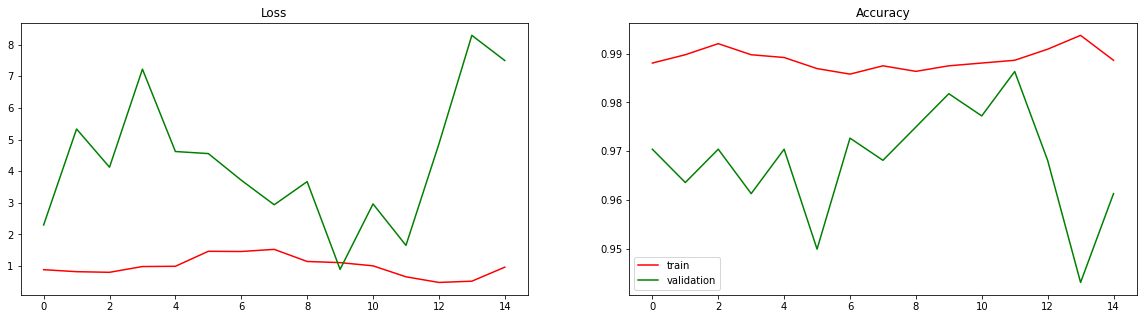

In [425]:
show_accuracy_and_loss_trands(history_4_rmsprop_2)

In [426]:
model_4_rmsprop_2_acc = show_eval(model_4, pre_val)

28/28 [==============================] - 5s 179ms/step - loss: 6.1302 - accuracy: 0.9613
Accuracy: 96


In [428]:
del(model_4)

###Model5

In [447]:
pretrained = Xception(weights='imagenet', include_top=False, pooling='max', input_shape=(pixels,pixels,channels))
for layer in pretrained.layers:
 layer.trainable=False

In [448]:
model_5 = Sequential([
     pretrained, 
     Dense(256), 
     Dense(num_classes, activation='softmax')]
)

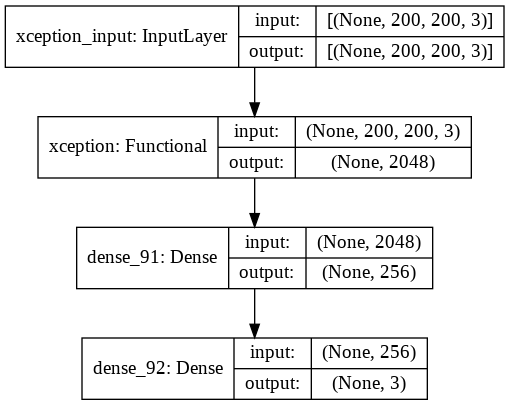

In [451]:
plot_model(model_5, show_shapes=True, show_layer_names=True)

####Test optimizers

######SGD

In [432]:
model_5.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [433]:
history_5_sgd = model_5.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 30s 249ms/step - loss: 2.8030 - accuracy: 0.7144 - val_loss: 0.1326 - val_accuracy: 0.9453
Epoch 2/15
110/110 [==============================] - 27s 242ms/step - loss: 0.1046 - accuracy: 0.9696 - val_loss: 0.0892 - val_accuracy: 0.9749
Epoch 3/15
110/110 [==============================] - 26s 241ms/step - loss: 0.0857 - accuracy: 0.9691 - val_loss: 0.0792 - val_accuracy: 0.9681
Epoch 4/15
110/110 [==============================] - 27s 243ms/step - loss: 0.0763 - accuracy: 0.9711 - val_loss: 0.0553 - val_accuracy: 0.9795
Epoch 5/15
110/110 [==============================] - 27s 245ms/step - loss: 0.0613 - accuracy: 0.9772 - val_loss: 0.0821 - val_accuracy: 0.9704
Epoch 6/15
110/110 [==============================] - 27s 244ms/step - loss: 0.0613 - accuracy: 0.9843 - val_loss: 0.0561 - val_accuracy: 0.9863
Epoch 7/15
110/110 [==============================] - 27s 246ms/step - loss: 0.0690 - accuracy: 0.9808 - val_loss: 0.0443 - val_ac

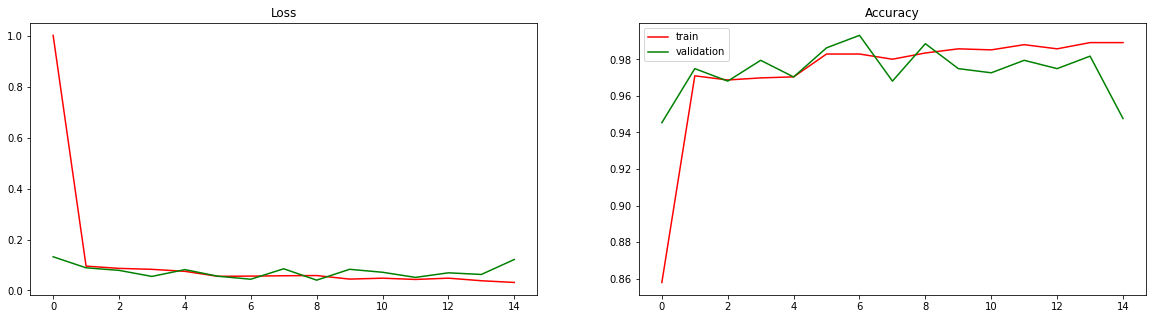

In [434]:
show_accuracy_and_loss_trands(history_5_sgd)

In [435]:
model_5_sgd_acc = show_eval(model_5, val)

28/28 [==============================] - 5s 194ms/step - loss: 0.1130 - accuracy: 0.9544
Accuracy: 95


######ADAM

In [436]:
model_5.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [437]:
history_5_adam = model_5.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 31s 260ms/step - loss: 1886.1567 - accuracy: 0.5952 - val_loss: 23.0009 - val_accuracy: 0.9408
Epoch 2/15
110/110 [==============================] - 28s 251ms/step - loss: 14.3572 - accuracy: 0.9516 - val_loss: 16.1259 - val_accuracy: 0.9362
Epoch 3/15
110/110 [==============================] - 27s 249ms/step - loss: 13.8453 - accuracy: 0.9567 - val_loss: 13.1418 - val_accuracy: 0.9499
Epoch 4/15
110/110 [==============================] - 28s 252ms/step - loss: 8.9363 - accuracy: 0.9719 - val_loss: 21.4778 - val_accuracy: 0.8998
Epoch 5/15
110/110 [==============================] - 28s 253ms/step - loss: 16.1225 - accuracy: 0.9465 - val_loss: 3.9446 - val_accuracy: 0.9749
Epoch 6/15
110/110 [==============================] - 28s 252ms/step - loss: 5.8263 - accuracy: 0.9680 - val_loss: 4.5574 - val_accuracy: 0.9522
Epoch 7/15
110/110 [==============================] - 28s 251ms/step - loss: 5.9152 - accuracy: 0.9631 - val_loss: 9.560

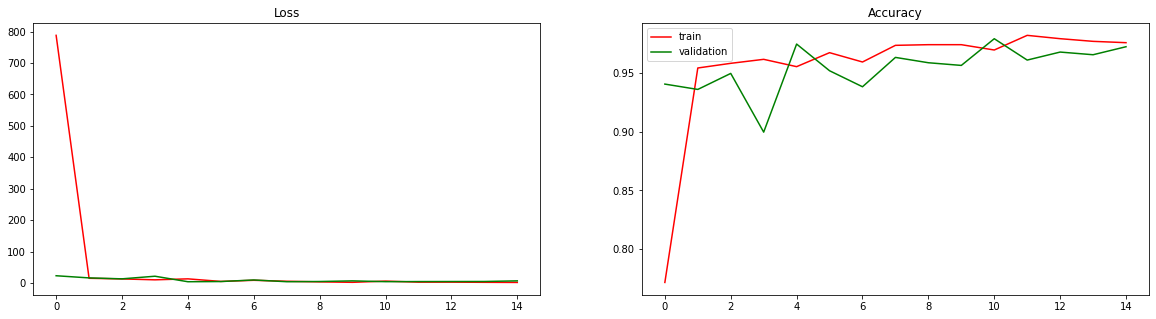

In [438]:
show_accuracy_and_loss_trands(history_5_adam)

In [439]:
model_5_adam_acc = show_eval(model_5, val)

28/28 [==============================] - 6s 196ms/step - loss: 3.0536 - accuracy: 0.9749
Accuracy: 97


######RMSprop

In [440]:
model_5.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [441]:
history_5_rmsprop = model_5.fit(train, epochs=epochs, validation_data=val)

Epoch 1/15
110/110 [==============================] - 31s 264ms/step - loss: 119.7589 - accuracy: 0.8584 - val_loss: 61.7202 - val_accuracy: 0.7745
Epoch 2/15
110/110 [==============================] - 28s 254ms/step - loss: 18.7471 - accuracy: 0.9278 - val_loss: 14.6991 - val_accuracy: 0.9180
Epoch 3/15
110/110 [==============================] - 28s 253ms/step - loss: 19.5682 - accuracy: 0.9364 - val_loss: 10.9741 - val_accuracy: 0.9362
Epoch 4/15
110/110 [==============================] - 28s 255ms/step - loss: 22.7215 - accuracy: 0.9107 - val_loss: 9.9492 - val_accuracy: 0.9453
Epoch 5/15
110/110 [==============================] - 28s 254ms/step - loss: 24.4693 - accuracy: 0.9503 - val_loss: 56.6493 - val_accuracy: 0.8269
Epoch 6/15
110/110 [==============================] - 28s 256ms/step - loss: 18.4641 - accuracy: 0.9517 - val_loss: 47.7623 - val_accuracy: 0.8724
Epoch 7/15
110/110 [==============================] - 28s 258ms/step - loss: 14.4629 - accuracy: 0.9370 - val_loss: 38

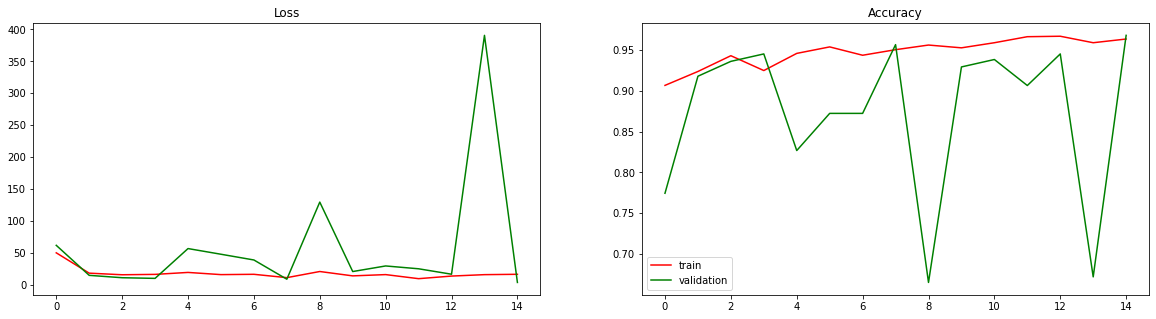

In [442]:
show_accuracy_and_loss_trands(history_5_rmsprop)

In [443]:
model_5_rmsprop_acc = show_eval(model_5, val)

28/28 [==============================] - 6s 207ms/step - loss: 5.0916 - accuracy: 0.9841
Accuracy: 98


####Test data

######SGD

In [449]:
model_5.compile(sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [450]:
history_5_sgd_2 = model_5.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 30s 255ms/step - loss: 3.0638 - accuracy: 0.7291 - val_loss: 0.2188 - val_accuracy: 0.9066
Epoch 2/15
110/110 [==============================] - 27s 248ms/step - loss: 0.2236 - accuracy: 0.9294 - val_loss: 0.1976 - val_accuracy: 0.9339
Epoch 3/15
110/110 [==============================] - 27s 249ms/step - loss: 0.1055 - accuracy: 0.9607 - val_loss: 0.1815 - val_accuracy: 0.9431
Epoch 4/15
110/110 [==============================] - 27s 247ms/step - loss: 0.0956 - accuracy: 0.9697 - val_loss: 0.1284 - val_accuracy: 0.9544
Epoch 5/15
110/110 [==============================] - 27s 248ms/step - loss: 0.1023 - accuracy: 0.9625 - val_loss: 0.1462 - val_accuracy: 0.9476
Epoch 6/15
110/110 [==============================] - 27s 248ms/step - loss: 0.1064 - accuracy: 0.9585 - val_loss: 0.1065 - val_accuracy: 0.9658
Epoch 7/15
110/110 [==============================] - 27s 245ms/step - loss: 0.0888 - accuracy: 0.9705 - val_loss: 0.2378 - val_ac

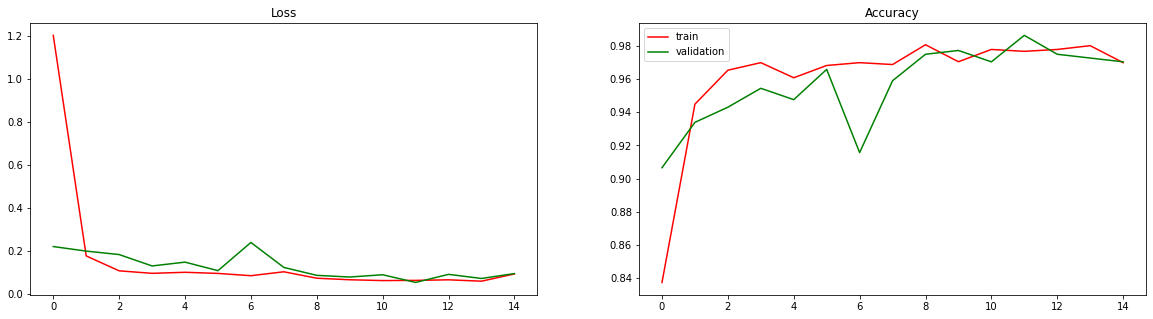

In [452]:
show_accuracy_and_loss_trands(history_5_sgd_2)

In [453]:
model_5_sgd_2_acc = show_eval(model_5, pre_val)

28/28 [==============================] - 5s 189ms/step - loss: 0.1042 - accuracy: 0.9590
Accuracy: 96


######ADAM

In [454]:
model_5.compile(adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [455]:
history_5_adam_2 = model_5.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 29s 246ms/step - loss: 118.9360 - accuracy: 0.6728 - val_loss: 10.5338 - val_accuracy: 0.9203
Epoch 2/15
110/110 [==============================] - 26s 237ms/step - loss: 14.4675 - accuracy: 0.8999 - val_loss: 26.6515 - val_accuracy: 0.8155
Epoch 3/15
110/110 [==============================] - 25s 230ms/step - loss: 4.3013 - accuracy: 0.9401 - val_loss: 2.9442 - val_accuracy: 0.9294
Epoch 4/15
110/110 [==============================] - 25s 228ms/step - loss: 1.9275 - accuracy: 0.9583 - val_loss: 4.9700 - val_accuracy: 0.9134
Epoch 5/15
110/110 [==============================] - 26s 233ms/step - loss: 1.7777 - accuracy: 0.9592 - val_loss: 3.1396 - val_accuracy: 0.9271
Epoch 6/15
110/110 [==============================] - 25s 226ms/step - loss: 3.1186 - accuracy: 0.9517 - val_loss: 4.7199 - val_accuracy: 0.9385
Epoch 7/15
110/110 [==============================] - 25s 228ms/step - loss: 2.2514 - accuracy: 0.9599 - val_loss: 10.0056 - 

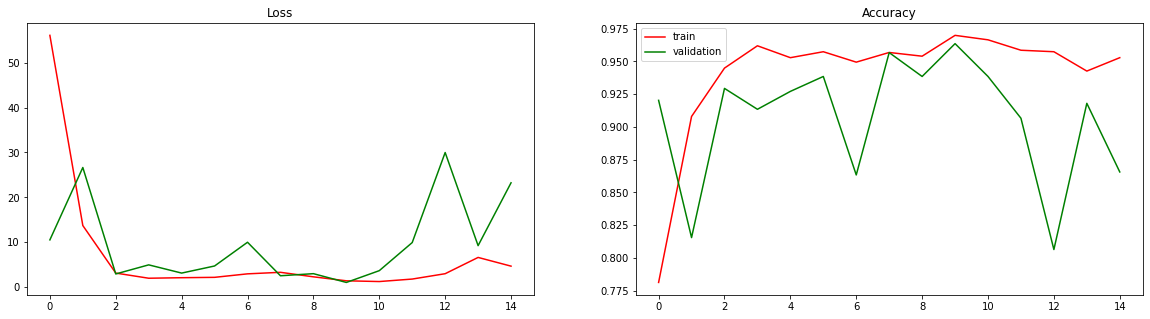

In [456]:
show_accuracy_and_loss_trands(history_5_adam_2)

In [457]:
model_5_adam_2_acc = show_eval(model_5, pre_val)

28/28 [==============================] - 5s 173ms/step - loss: 25.3437 - accuracy: 0.8747
Accuracy: 87


######RMSprop

In [458]:
model_5.compile(rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [459]:
history_5_rmsprop_2 = model_5.fit(pre_train, epochs=epochs, validation_data=pre_val)

Epoch 1/15
110/110 [==============================] - 27s 229ms/step - loss: 10.3593 - accuracy: 0.9390 - val_loss: 13.7502 - val_accuracy: 0.9203
Epoch 2/15
110/110 [==============================] - 24s 222ms/step - loss: 4.6644 - accuracy: 0.9521 - val_loss: 2.0912 - val_accuracy: 0.9704
Epoch 3/15
110/110 [==============================] - 25s 227ms/step - loss: 4.9210 - accuracy: 0.9564 - val_loss: 11.1342 - val_accuracy: 0.9134
Epoch 4/15
110/110 [==============================] - 24s 222ms/step - loss: 3.6159 - accuracy: 0.9602 - val_loss: 19.4903 - val_accuracy: 0.8952
Epoch 5/15
110/110 [==============================] - 24s 221ms/step - loss: 5.2827 - accuracy: 0.9623 - val_loss: 40.4813 - val_accuracy: 0.8223
Epoch 6/15
110/110 [==============================] - 25s 223ms/step - loss: 6.2858 - accuracy: 0.9477 - val_loss: 3.0590 - val_accuracy: 0.9704
Epoch 7/15
110/110 [==============================] - 24s 220ms/step - loss: 4.5730 - accuracy: 0.9586 - val_loss: 6.0143 - v

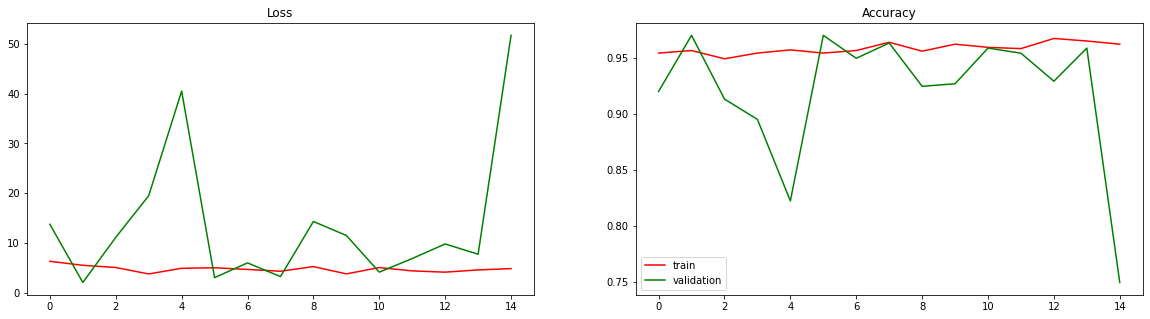

In [460]:
show_accuracy_and_loss_trands(history_5_rmsprop_2)

In [461]:
model_5_rmsprop_2_acc = show_eval(model_5, pre_val)

28/28 [==============================] - 5s 177ms/step - loss: 55.9997 - accuracy: 0.7426
Accuracy: 74


## Comparison

Finally


In [578]:
result_df = pd.DataFrame(
    data=[
          [model_1_sgd_acc, model_1_adam_acc, model_1_rmsprop_acc, model_1_sgd_2_acc, model_1_adam_2_acc, model_1_rmsprop_2_acc], 
          [model_2_sgd_acc, model_2_adam_acc, model_2_rmsprop_acc, model_2_sgd_2_acc, model_2_adam_2_acc, model_2_rmsprop_2_acc], 
          [model_3_sgd_acc, model_3_adam_acc, model_3_rmsprop_acc, model_3_sgd_2_acc, model_3_adam_2_acc, model_3_rmsprop_2_acc], 
          [model_4_sgd_acc, model_4_adam_acc, model_4_rmsprop_acc, model_4_sgd_2_acc, model_4_adam_2_acc, model_4_rmsprop_2_acc], 
          [model_5_sgd_acc, model_5_adam_acc, model_5_rmsprop_acc, model_5_sgd_2_acc, model_5_adam_2_acc, model_5_rmsprop_2_acc], 
          ],
          columns=['SGD','ADAM','RMSprop', 'SGD_2nd', 'Adam_2nd','RMSprop_2nd'],
          index=[  'Complex', 'VGG19', 'DenseNet201', 'ResNet101V', 'Xception']
          )
result_df

,SGD,ADAM,RMSprop,SGD_2nd,Adam_2nd,RMSprop_2nd
Complex,0.924836,0.913410,0.915739,0.913444,0.798648,0.904321
VGG19,0.965831,0.808656,0.945330,0.564920,0.747153,0.933941
DenseNet201,1.000000,0.826879,0.986333,0.674260,0.881549,0.915718
ResNet101V,0.958998,0.961276,0.965831,0.945330,0.970387,0.961276
Xception,0.954442,0.974943,0.984055,0.958998,0.874715,0.742597
